This notebook consists of two tasks. 

You should read and run it and  fill all the parts containing the **TODO** words.

# Task 1: What influences weight loss [40 points]

In this section, you will investigate the factors influencing weight. In particular, we are interested whether amount of smoking now affects body weight after 10 years. The null hypothesis is that amount smoking does not affect it. 

We will explore the data from US [National Health and Nutrition Examination Survey Data I Epidemiologic Follow-up Study](https://wwwn.cdc.gov/nchs/nhanes/nhefs/default.aspx/). It includes data from persons 25-74 years of age who completed a medical examination in 1971. Follow-up examinations were carried out several years later to investigate the relationships between clinical, nutritional, and behavioral factors.

We use a subset of data preprocessed for [Hernán MA, Robins JM (2020). Causal Inference: What If. Boca Raton: Chapman & Hall/CRC.](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/). It includes only people who were smoking in 1971. A codebook describing the meaning of the variables is available as [an Excel table](https://cdn1.sph.harvard.edu/wp-content/uploads/sites/1268/2012/10/NHEFS_Codebook.xls).

To test the null hypothesis about effect of smoking intensity on weight loss, you should train a regression model predicting weight in year 1982 (`wt82`) using number of cigarretes smoked per day in 1971 (`smokeintensity`) and control factors from year 1971 that might affect weight later, such as sex (`sex`), age `age`, and, obviously,  weight in 1971 (`wt71`), and test the significance of the coefficients for the variables of interest. 

You may use any other variables, but only if they are not "from the future" (observed later than 1971). 

If you intent to do feature engineering, such as nonlinear features or interactions, you may want to read [the statsmodels documentation about their formula language](https://www.statsmodels.org/stable/example_formulas.html).

In [ ]:
!wget https://cdn1.sph.harvard.edu/wp-content/uploads/sites/1268/2017/01/nhefs_excel.zip
!unzip nhefs_excel.zip 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns


In [2]:
data = pd.read_excel('NHEFS.xls')
print(data.shape)
data.sample(10)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(1629, 64)


,seqn,qsmk,death,yrdth,modth,dadth,sbp,dbp,sex,age,...,birthcontrol,pregnancies,cholesterol,hightax82,price71,price82,tax71,tax82,price71_82,tax71_82
442,11368,0,1,89.0,3.0,18.0,121.0,83.0,0,25,...,2,NaN,273.0,0.0,2.167969,1.940186,1.049805,0.549927,0.227875,0.500000
184,4959,0,0,NaN,NaN,NaN,139.0,78.0,1,44,...,0,7.0,275.0,0.0,2.461914,1.850098,1.391113,0.582886,0.612061,0.808228
7,266,0,0,NaN,NaN,NaN,100.0,53.0,1,29,...,0,2.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,15844,0,0,NaN,NaN,NaN,NaN,NaN,1,55,...,0,2.0,265.0,0.0,2.346680,1.797363,1.364990,0.571899,0.549316,0.792969
1507,24336,0,0,NaN,NaN,NaN,119.0,68.0,1,36,...,0,3.0,212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559,14076,0,0,NaN,NaN,NaN,117.0,75.0,0,29,...,2,NaN,209.0,0.0,2.183594,1.739990,1.102295,0.461975,0.443787,0.640381
270,6997,1,1,83.0,10.0,29.0,NaN,NaN,0,58,...,2,NaN,243.0,0.0,2.094727,1.867676,0.944946,0.395996,0.226990,0.548950
1206,22673,1,0,NaN,NaN,NaN,145.0,91.0,1,54,...,0,2.0,230.0,0.0,2.183594,1.739990,1.102295,0.461975,0.443787,0.640381
805,20303,1,0,NaN,NaN,NaN,NaN,NaN,0,55,...,2,NaN,270.0,0.0,1.569580,1.513428,0.551270,0.230988,0.056198,0.320251
458,11880,0,1,85.0,12.0,16.0,229.0,94.0,0,50,...,2,NaN,351.0,0.0,2.099609,1.775391,0.997437,0.417969,0.324585,0.579468


In [15]:
non_missing = data[data.wt82.notnull()]

<b>TODO: Visualize and summarize the joint distribution of weight in 1982, weight in 1971, and smoking intensity in 1971. Comment on it. </b>

In [31]:
#d = data[[data.wt71.notnull(), data.wt82.notnull(), data.smokeintensity.notnull()]]
t = data[(data.wt71.notnull()) & (data.wt82.notnull()) & (data.smokeintensity.notnull()) ][['wt71',"seqn", "wt82", "smokeintensity"]]

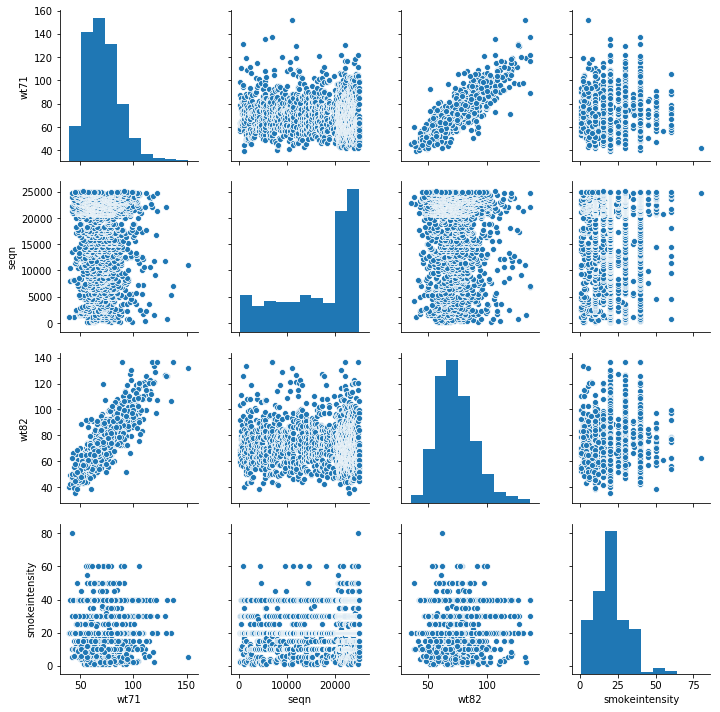

In [32]:
sns.pairplot(t)

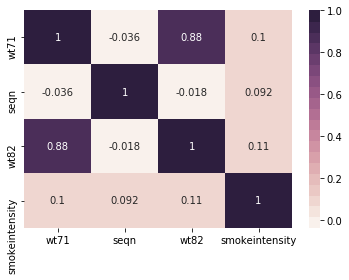

In [39]:
sns.heatmap(t.corr(),annot=True, cmap=sns.cubehelix_palette(20,  light=0.95, dark=0.15))

From the above, we can conclude that there is linear relation between wt71 and wt82 (as expected). We cant see correlation between smokeintenisty and wt82

<b>TODO: improve the model below by including more and better factors in it</b>

In [4]:
# TODO: add more factors to the model
model = smf.ols(data=non_missing, formula='wt82~wt71+smokeintensity').fit()  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wt82   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     2584.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:43:22   Log-Likelihood:                -5435.5
No. Observations:                1566   AIC:                         1.088e+04
Df Residuals:                    1563   BIC:                         1.089e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.5582      0.966      7.826      0.000       5.664       9.452
wt71               0.9219      0.013     71.329      0.000       0.897       0.947
smokeintensity     0.0298      0.017      1.772      0.077      -0.003       0.063
==============================================================================
Omnibus:                      171.805   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              874.035
Skew:                           0.382   Prob(JB):                    1.61e-190
Kurtosis:                       6.579   Cond. No.                         370.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

lets try to do some feature selection for improving the model:

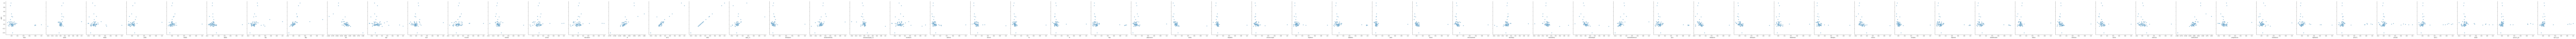

In [68]:
sns.pairplot(
    non_missing.corr(),
    x_vars=non_missing.columns,
    y_vars=['wt82'],height=5
)
plt.show() 

In [96]:
abs(non_missing.corr(method='kendall').wt82).sort_values(ascending = False).head()

wt82            1.000000
wt71            0.703535
sex             0.372242
ht              0.359638
birthcontrol    0.333258
Name: wt82, dtype: float64

In [94]:
abs(non_missing.corr(method='pearson').wt82).sort_values(ascending = False).head()

wt82            1.000000
wt71            0.875975
ht              0.487693
sex             0.401509
birthcontrol    0.369947
Name: wt82, dtype: float64

In [95]:
abs(non_missing.corr(method='spearman').wt82).sort_values(ascending = False).head()

wt82            1.000000
wt71            0.873265
ht              0.510236
sex             0.453648
birthcontrol    0.421535
Name: wt82, dtype: float64

In [116]:
def pow(x,p):
    return x**p

model = smf.ols(data=non_missing, formula='wt82~wt71+pow(smokeintensity,0)+ht*sex+age').fit()  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wt82   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1123.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:49:59   Log-Likelihood:                -5384.1
No. Observations:                1566   AIC:                         1.078e+04
Df Residuals:                    1560   BIC:                         1.081e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.5521      3.569      0.995      0.320      -3.449      10.553
wt71                       0.8930      0.014     61.744      0.000       0.865       0.921
pow(smokeintensity, 0)     3.5521      3.569      0.995      0.320      -3.449      10.553
ht                         0.0591      0.041      1.427      0.154      -0.022       0.140
sex                       -6.3403     10.198     -0.622      0.534     -26.343      13.663
ht:sex                     0.0320      0.061      0.527      0.598      -0.087       0.151
age                       -0.1437      0.016     -8.859      0.000      -0.176      -0.112
==============================================================================
Omnibus:                      207.674   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              960.905
Skew:                           0.543   Prob(JB):                    2.20e-209
Kurtosis:                       6.681   Cond. No.                     1.45e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.23e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Interpretation


<b>TODO: Write here your conclusions about the impact of the variables on interest on weight loss and the overall analysis your model: 
*  What is the overall accuracy of the model?
*  Which factors do have strong relations to the target variable, and which do not?
*  How the values of the significant coefficients may be interpreted? 
</b>



# Task 2: Credit scoring and comparing models [60 points]

In this part, you should train a logistic regression to predict probability of not returning a loan by a bank client. 

This problem be focused not on explaining *why* some clients do not return the loan, but only on predicting *whether* they will return it (or, rather, with what probability they don't return). Therefore, we don't *have* to perform statistical tests for the model coefficients. However, these test might still be useful for finding the variables that are really useful for predicting the outcome. 

To validate the quality of prediction on the new data, we will split the data into the train and test parts. 

In [123]:
credit_data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/credit.csv')
print(credit_data.shape)
y = credit_data['default'] - 1  # get 1 for not returning loan, 0 for returning it
print(y.mean())
predictors = credit_data.drop('default', axis=1)
predictors.sample(5).T

(1000, 21)
0.3


,25,620,781,301,552
checking_balance,< 0 DM,1 - 200 DM,unknown,1 - 200 DM,< 0 DM
months_loan_duration,6,21,24,36,48
credit_history,repaid,critical,critical,fully repaid,repaid
purpose,furniture,business,car (new),radio/tv,radio/tv
amount,1374,3652,1940,3804,6999
savings_balance,< 100 DM,< 100 DM,> 1000 DM,< 100 DM,< 100 DM
employment_length,1 - 4 yrs,4 - 7 yrs,> 7 yrs,1 - 4 yrs,4 - 7 yrs
installment_rate,1,2,4,4,1
personal_status,single male,single male,single male,female,married male
other_debtors,none,none,none,none,guarantor


Some of the variables are categorical. To make all the data numerical, one may perform one-hot encoding of the categorical columns. 

In [143]:
X = pd.get_dummies(predictors, drop_first=True)
X.sample(3).T.head(20)


,843,327,848
months_loan_duration,24,24,9
amount,1559,1525,1364
installment_rate,4,4,3
residence_history,4,3,4
age,50,34,59
existing_credits,1,1,1
dependents,1,2,1
checking_balance_< 0 DM,0,0,1
checking_balance_> 200 DM,0,0,0
checking_balance_unknown,1,1,0


In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Here is the logistic regression model trained on all the variables. However, only for the numerical variables here the test for coefficient significance makes sense. 

**TODO: interpret the signs and significance of the numerical factors (the first 7, from `months_loan_duration` to `dependents`).**


In [135]:
import statsmodels.api as sm
full_model = sm.Logit(y_train, X_train).fit()
full_model.summary()

Optimization terminated successfully.
         Current function value: 0.442847
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  800
Model:                          Logit   Df Residuals:                      752
Method:                           MLE   Df Model:                           47
Date:                Sat, 21 Nov 2020   Pseudo R-squ.:                  0.2763
Time:                        18:52:30   Log-Likelihood:                -354.28
converged:                       True   LL-Null:                       -489.54
                                        LLR p-value:                 3.616e-33
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
months_loan_duration                      0.0213      0.011      1.959      0.050   -1.58e-05       0.043
amount                                    0.0002   5.08e-05      2.978      0.003    5.17e-05       0.000
installment_rate                          0.3783      0.097      3.897      0.000       0.188       0.569
residence_history                         0.0621      0.098      0.632      0.527      -0.130       0.254
age                                      -0.0245      0.010     -2.426      0.015      -0.044      -0.005
existing_credits                          0.1382      0.215      0.643      0.520      -0.283       0.560
dependents                                0.2452      0.282      0.870      0.384      -0.307       0.798
checking_balance_< 0 DM                   0.4707      0.245      1.920      0.055      -0.010       0.951
checking_balance_> 200 DM                -0.3975      0.417     -0.954      0.340      -1.214       0.419
checking_balance_unknown                 -1.2433      0.261     -4.766      0.000      -1.755      -0.732
credit_history_delayed                    0.5815      0.373      1.558      0.119      -0.150       1.313
credit_history_fully repaid               1.5679      0.504      3.109      0.002       0.579       2.556
credit_history_fully repaid this bank     1.2451      0.476      2.618      0.009       0.313       2.177
credit_history_repaid                     0.8976      0.290      3.099      0.002       0.330       1.465
purpose_car (new)                         0.3241      0.362      0.896      0.370      -0.385       1.033
purpose_car (used)                       -1.7608      0.514     -3.428      0.001      -2.768      -0.754
purpose_domestic appliances               0.0308      0.841      0.037      0.971      -1.617       1.679
purpose_education                         0.1605      0.542      0.296      0.767      -0.902       1.223
purpose_furniture                        -0.5335      0.391     -1.365      0.172      -1.300       0.233
purpose_others                           -0.9993      0.839     -1.192      0.233      -2.643       0.644
purpose_radio/tv                         -0.6139      0.373     -1.644      0.100      -1.346       0.118
purpose_repairs                           0.5752      0.722      0.797      0.425      -0.839       1.989
purpose_retraining                       -1.3668      1.308     -1.045      0.296      -3.930       1.196
savings_balance_501 - 1000 DM             0.0542      0.508      0.107      0.915      -0.942       1.051
savings_balance_< 100 DM                  0.2076      0.325      0.639      0.523      -0.429       0.844
savings_balance_> 1000 DM                -1.1727      0.657     -1.784      0.074      -2.461       0.115
savings_balance_unknown                  -0.6061      0.394     -1.537      0.124      -1.379       0.167
employment_length_1 - 4 yrs              -0.1662      0.271  

Quality of binary classification can be assessed with [ROC AUC score](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc). Here we calculate it for the training and testing data. 

In [136]:
from sklearn.metrics import roc_auc_score
print('train ROC AUC: ', roc_auc_score(y_train, full_model.predict(X_train)))
print('test  ROC AUC: ', roc_auc_score(y_test, full_model.predict(X_test)))

train ROC AUC:  0.8418708571174074
test  ROC AUC:  0.7677605481428057


For the categorical variables, their encoded values are linearly dependent, so there is no unique way to estimate the coefficients. We could fix this by dropping one category for each categorical variable, but then we still would need some way to test significance of all the other categories simultaneosly.

One way to perform such a test is [likelihood ratio test](https://en.wikipedia.org/wiki/Likelihood-ratio_test). It is based on the [Wilk's theorem](https://en.wikipedia.org/wiki/Wilks%27_theorem): if one model is a restricted version of another model, and both have been trained with maximum likelihood method, and in fact the restricted version is the correct one, then the value $2 (LL_1 - LL_0)$ has asymptotic distribution $\chi^2_k$, where $LL_1$ and $LL_0$ are log-likelihoods of the full and restricted models, and $k$ is the difference between them in degrees of freedom. 

In our case, the full model is trained above, and the restricted model below lacks coefficients for the `purpose_` variables. If the null hypothesis is true, and the restricted model is correct (which means that stated purpose of loan does not affect the probability of returning it), then the difference between the log likelihoods of two models will be not too large in comparison with typical walues of $\chi^2_k$ distribution. Here $k$ equals number of excluded predictiors minus 1, because there has already been one linear dependence between these predictors. 

In [137]:
excluded_columns = X_train.columns[X_train.columns.str.startswith('purpose_')]
print(excluded_columns)
change_in_dof = len(excluded_columns) - 1
X_train_smaller = X_train.drop(excluded_columns, axis=1)
smaller_model = sm.Logit(y_train, X_train_smaller).fit()
print(smaller_model.llf) # log likelihood of it

Index(['purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education', 'purpose_furniture',
       'purpose_others', 'purpose_radio/tv', 'purpose_repairs',
       'purpose_retraining'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.465596
         Iterations 7
-372.4771144546101


<b>TODO: Perform the likelihood ratio test for the hypothesis that `smaller_model` is the true version of the `full_model`, i.e. that purpose does not affect probability of returning a loan. 

Use the `llf` property of both models to get their log likelihood. 

Calculate the $\chi^2$ p-value for the test and interpret it.
</b>


In [146]:
import scipy.stats
test_statistic = smaller_model.summary()# todo: your code here

print(test_statistic)
p_value = # todo: your code here
print(p_value)

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  800
Model:                          Logit   Df Residuals:                      761
Method:                           MLE   Df Model:                           38
Date:                Sat, 21 Nov 2020   Pseudo R-squ.:                  0.2391
Time:                        19:33:21   Log-Likelihood:                -372.48
converged:                       True   LL-Null:                       -489.54
                                        LLR p-value:                 4.558e-30
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
months_loan_duration                      0.0195      0.010      1.858      0.063      -0.001       0.040
amount                                    0.0001  

<b>TODO: Apply the same method of likelihood ratio test to the hypothesis that `employment_length` does not affect the probability of returning a loan. 
</b>


In [ ]:
# TODO: your code here

If one cannot reject the hypothesis that a variable affects the target, it seems reasonable to exclude the variable from the model and hope that the model performance does not fall much. This logic can be used to simplify the model by excluding the not-so-useful factors from it, and it is one of popular methods of feature selection. 

<b>Todo: Train a model without all factors for which you accept the hypothesis that they don't affect the outcome:
- create a list of factors that you intend to exclude
- create new versions of `X_train` and `X_test` without these factors
- train the simplified model on `X_train`
- evaluate performance of the model with ROC AUC on the train and test sets and compare it with the performance of the whole model. Comment on it. 
 </b>

In [ ]:
# TODO: your code here